In [2]:
from base import Model, Model_Object, get_predefined_system
import sympy as sp
import numpy as np
from math import atan2
from scipy.constants import g as g_value
from sympy.physics.vector import dynamicsymbols

In [3]:
C = get_predefined_system('InvSpherical')

consts1 = sp.symbols('m g L R h b')
m, g, L, R, h, b = consts1
th, ph = dynamicsymbols(f'{C.U[1].name} {C.U[2].name}', positive=True, real=True)
TENSION = sp.symbols('TENSION')
θ_mag = sp.atan2(R, (L+h))
r_mag = sp.sqrt((L+h)**2 + R**2)
# θ_mag = sp.symbols('θ_mag')

num_magnets = 4
magnet_polarity_list = sp.symbols(f'p_0:{num_magnets}')
magnet_φmag_list = sp.symbols(f'phi_mag0:{num_magnets}', latex=rf'\phi_mag\,0:{num_magnets}')

constants = list(consts1) + list(magnet_polarity_list) + list(magnet_φmag_list)
# constants = list(consts1) + list(magnet_polarity_list) + list(magnet_φmag_list) + [θ_mag]

P = Model(C, constants_list=constants, name='Pendulum')
bob = Model_Object(P, m, name='bob', position_overwrite=[L, th, ph])

In [4]:
def gravity():
    z = C.position_vector.dot(P.coordsystem.C.k)
    return m*g*(z)

def magnetic_potential_energy_single(polarity, φ_mag_i):
    magnet_position = (r_mag, θ_mag, φ_mag_i)
    return polarity/(P.coordsystem.get_distance(magnet_position))**3 * -sp.Rational(1,3)

def magnetic_potential_energy():
    return sum(
        magnetic_potential_energy_single(polarity, φ_mag_i)
        for polarity, φ_mag_i in zip(magnet_polarity_list, magnet_φmag_list)
    )

def damping_force():
    return -b*C.velocity_vector

In [5]:
P.add_energies(
    GPE = gravity(),
    Vmag = magnetic_potential_energy()
)

P.add_forces(
    damping = damping_force(),
    tension = [-TENSION, 0, 0]
)

# bob.acceleration_equations(0)

#### testing Vmag results

In [6]:
θmag, rmag = sp.symbols('θ_mag r_mag')
rt, θt, ϕt = dynamicsymbols(' '.join([f'{u.name}' for u in C.U]), real=True, positive=True)

In [7]:
Vmag = P.Energy(magnetic_potential_energy())
Fmag = Vmag.to_force().F
# f = bob.overall_force().F[-1]


##### wrt $\phi$

In [8]:
f2 = Fmag[2]
f2

(R*p_0*r(t)*sin(phi_mag0 - φ(t))*sin(θ(t))/(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag0 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2) + R*p_1*r(t)*sin(phi_mag1 - φ(t))*sin(θ(t))/(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag1 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2) + R*p_2*r(t)*sin(phi_mag2 - φ(t))*sin(θ(t))/(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag2 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2) + R*p_3*r(t)*sin(phi_mag3 - φ(t))*sin(θ(t))/(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag3 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2))/(r(t)*Abs(sin(θ(t))))

In [9]:
dist0 = f2.args[2].args[0].args[3].args[0]
dist_list = [dist0.subs(magnet_φmag_list[0], magnet_φmag_list[i]) for i in range(4)]
dist_names = sp.symbols(f'dist0:{num_magnets}')
dist0_name = dist_names[0]

new_f2 = f2.subs(zip(dist_list, [d**2 for d in dist_names])).subs(rt, L)
new_f2

(R*p_0*r(dist0**2)*sin(phi_mag0 - φ(dist0**2))*sin(θ(dist0**2))/(L**2 + 2*L*h - 2*L*r(dist0**2)*cos(θ(dist0**2)) + R**2 - 2*R*r(dist0**2)*sin(θ(dist0**2))*cos(phi_mag0 - φ(dist0**2)) + h**2 - 2*h*r(dist0**2)*cos(θ(dist0**2)) + r(dist0**2)**2)**(5/2) + R*p_1*r(dist0**2)*sin(phi_mag1 - φ(dist0**2))*sin(θ(dist0**2))/(L**2 + 2*L*h - 2*L*r(dist0**2)*cos(θ(dist0**2)) + R**2 - 2*R*r(dist0**2)*sin(θ(dist0**2))*cos(phi_mag1 - φ(dist0**2)) + h**2 - 2*h*r(dist0**2)*cos(θ(dist0**2)) + r(dist0**2)**2)**(5/2) + R*p_2*r(dist0**2)*sin(phi_mag2 - φ(dist0**2))*sin(θ(dist0**2))/(L**2 + 2*L*h - 2*L*r(dist0**2)*cos(θ(dist0**2)) + R**2 - 2*R*r(dist0**2)*sin(θ(dist0**2))*cos(phi_mag2 - φ(dist0**2)) + h**2 - 2*h*r(dist0**2)*cos(θ(dist0**2)) + r(dist0**2)**2)**(5/2) + R*p_3*r(dist0**2)*sin(phi_mag3 - φ(dist0**2))*sin(θ(dist0**2))/(L**2 + 2*L*h - 2*L*r(dist0**2)*cos(θ(dist0**2)) + R**2 - 2*R*r(dist0**2)*sin(θ(dist0**2))*cos(phi_mag3 - φ(dist0**2)) + h**2 - 2*h*r(dist0**2)*cos(θ(dist0**2)) + r(dist0**2)**2)**(5/

In [10]:
bit = sp.simplify((new_f2.args[2].args[0]) / (L*sp.Abs(sp.sin(θt)))                                                                                                                                                                                                                                                                                                                                                                     * (dist0_name**2)**sp.Rational(5,2) / magnet_polarity_list[0])
bit

R*(dist0**2)**(5/2)*r(dist0**2)*sin(phi_mag0 - φ(dist0**2))*sin(θ(dist0**2))/(L*(L**2 + 2*L*h - 2*L*r(dist0**2)*cos(θ(dist0**2)) + R**2 - 2*R*r(dist0**2)*sin(θ(dist0**2))*cos(phi_mag0 - φ(dist0**2)) + h**2 - 2*h*r(dist0**2)*cos(θ(dist0**2)) + r(dist0**2)**2)**(5/2)*Abs(sin(θ(t))))

In [11]:
my_eqn = -rmag*(sp.sin(θmag)*sp.sin(magnet_φmag_list[0]-ϕt))
my_eqn = sp.simplify(my_eqn.subs(rmag, r_mag).subs(θmag, θ_mag))
my_eqn

-R*sin(phi_mag0 - φ(t))

In [12]:
sp.simplify(my_eqn + bit)

KeyboardInterrupt: 

##### wrt $\theta$

In [ ]:
f1 = Fmag[1]
f1

new_f1 = f1.subs(zip(dist_list, [d**2 for d in dist_names])).subs(rt, L)
new_f1

In [ ]:
bit = sp.simplify(new_f1.args[1].args[0] / L * (dist0_name**2)**sp.Rational(5,2) / magnet_polarity_list[0])
bit

In [ ]:
my_eqn = rmag*(sp.cos(θt)*sp.sin(θmag)*sp.cos(magnet_φmag_list[0]-ϕt) - sp.sin(θt)*sp.cos(θmag))
my_eqn = sp.simplify(my_eqn.subs(rmag, r_mag).subs(θmag, θ_mag))
my_eqn

In [ ]:
sp.simplify(my_eqn + bit)

##### ...

##### check:

In [ ]:
### check this actually is the distance we expect:

my_eqn = (L**2 + rmag**2 - 2*L*rmag*(sp.sin(θt)*sp.sin(θmag)*sp.cos(ϕt - magnet_φmag_list[0]) + sp.cos(θt)*sp.cos(θmag)))
my_eqn = sp.simplify(my_eqn.subs(rmag, r_mag).subs(θmag, θ_mag))
a = sp.simplify(
    my_eqn
    - r_mag**2
    - L**2
    + 2*L*R*sp.sin(θt)*sp.cos(magnet_φmag_list[0] - ϕt)
)

b = sp.simplify(
    dist_list[0].subs(rt, L)
    - r_mag**2
    - L**2
    + 2*L*R*sp.sin(θt)*sp.cos(magnet_φmag_list[0] - ϕt)
)

display(a,b)

-2*L*(L + h)*cos(θ(t))

2*L*(-L - h)*cos(θ(t))

#### testing the lame coefficients issue (abs(sin(theta)))

In [ ]:
C.lame_coefficients

array([1, r(t), r(t)*Abs(sin(θ(t)))], dtype=object)

#### end of testing

In [13]:
# placeholder_force_over_mass = np.array(sp.symbols('F_1 F_2 F_3'))
eqns = bob.acceleration_equations()

found free variables in acceleration wrt r(t):{TENSION}. assuming acceleration in this direction is 0


In [14]:
sp.diff(L, dynamicsymbols._t)

0

In [15]:
forces = bob.overall_force().F
for f in forces:
    display(f)

-TENSION - b*Derivative(r(t), t) + g*m*cos(θ(t)) + p_0*(3*L*cos(θ(t)) + 3*R*sin(θ(t))*cos(phi_mag0 - φ(t)) + 3*h*cos(θ(t)) - 3*r(t))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag0 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)) + p_1*(3*L*cos(θ(t)) + 3*R*sin(θ(t))*cos(phi_mag1 - φ(t)) + 3*h*cos(θ(t)) - 3*r(t))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag1 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)) + p_2*(3*L*cos(θ(t)) + 3*R*sin(θ(t))*cos(phi_mag2 - φ(t)) + 3*h*cos(θ(t)) - 3*r(t))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag2 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)) + p_3*(3*L*cos(θ(t)) + 3*R*sin(θ(t))*cos(phi_mag3 - φ(t)) + 3*h*cos(θ(t)) - 3*r(t))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag3 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2))

-b*r(t)*Derivative(θ(t), t) + (-g*m*r(t)*sin(θ(t)) + p_0*(-3*L*r(t)*sin(θ(t)) + 3*R*r(t)*cos(phi_mag0 - φ(t))*cos(θ(t)) - 3*h*r(t)*sin(θ(t)))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag0 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)) + p_1*(-3*L*r(t)*sin(θ(t)) + 3*R*r(t)*cos(phi_mag1 - φ(t))*cos(θ(t)) - 3*h*r(t)*sin(θ(t)))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag1 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)) + p_2*(-3*L*r(t)*sin(θ(t)) + 3*R*r(t)*cos(phi_mag2 - φ(t))*cos(θ(t)) - 3*h*r(t)*sin(θ(t)))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag2 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)) + p_3*(-3*L*r(t)*sin(θ(t)) + 3*R*r(t)*cos(phi_mag3 - φ(t))*cos(θ(t)) - 3*h*r(t)*sin(θ(t)))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag3 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)))/r(t)

-b*r(t)*sin(θ(t))**2*Derivative(φ(t), t)/Abs(sin(θ(t))) + (R*p_0*r(t)*sin(phi_mag0 - φ(t))*sin(θ(t))/(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag0 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2) + R*p_1*r(t)*sin(phi_mag1 - φ(t))*sin(θ(t))/(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag1 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2) + R*p_2*r(t)*sin(phi_mag2 - φ(t))*sin(θ(t))/(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag2 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2) + R*p_3*r(t)*sin(phi_mag3 - φ(t))*sin(θ(t))/(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag3 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2))/(r(t)*Abs(sin(θ(t))))

In [16]:
for e in eqns:
    display(e)
#     if e != sp.Expr(0):
#         display(sp.simplify(e))

0

(L*sin(2*θ(t))*Derivative(φ(t), t)**2/2 + (-L*b*Derivative(θ(t), t) + (-L*g*m*sin(θ(t)) + p_0*(-3*L**2*sin(θ(t)) + 3*L*R*cos(phi_mag0 - φ(t))*cos(θ(t)) - 3*L*h*sin(θ(t)))/(3*(-2*L**2*cos(θ(t)) + 2*L**2 - 2*L*R*sin(θ(t))*cos(phi_mag0 - φ(t)) - 2*L*h*cos(θ(t)) + 2*L*h + R**2 + h**2)**(5/2)) + p_1*(-3*L**2*sin(θ(t)) + 3*L*R*cos(phi_mag1 - φ(t))*cos(θ(t)) - 3*L*h*sin(θ(t)))/(3*(-2*L**2*cos(θ(t)) + 2*L**2 - 2*L*R*sin(θ(t))*cos(phi_mag1 - φ(t)) - 2*L*h*cos(θ(t)) + 2*L*h + R**2 + h**2)**(5/2)) + p_2*(-3*L**2*sin(θ(t)) + 3*L*R*cos(phi_mag2 - φ(t))*cos(θ(t)) - 3*L*h*sin(θ(t)))/(3*(-2*L**2*cos(θ(t)) + 2*L**2 - 2*L*R*sin(θ(t))*cos(phi_mag2 - φ(t)) - 2*L*h*cos(θ(t)) + 2*L*h + R**2 + h**2)**(5/2)) + p_3*(-3*L**2*sin(θ(t)) + 3*L*R*cos(phi_mag3 - φ(t))*cos(θ(t)) - 3*L*h*sin(θ(t)))/(3*(-2*L**2*cos(θ(t)) + 2*L**2 - 2*L*R*sin(θ(t))*cos(phi_mag3 - φ(t)) - 2*L*h*cos(θ(t)) + 2*L*h + R**2 + h**2)**(5/2)))/L)/m)/L

(-2*L*Derivative(θ(t), t)*Derivative(φ(t), t)/tan(θ(t)) + (-L*b*sin(θ(t))**2*Derivative(φ(t), t)/Abs(sin(θ(t))) + (L*R*p_0*sin(phi_mag0 - φ(t))*sin(θ(t))/(-2*L**2*cos(θ(t)) + 2*L**2 - 2*L*R*sin(θ(t))*cos(phi_mag0 - φ(t)) - 2*L*h*cos(θ(t)) + 2*L*h + R**2 + h**2)**(5/2) + L*R*p_1*sin(phi_mag1 - φ(t))*sin(θ(t))/(-2*L**2*cos(θ(t)) + 2*L**2 - 2*L*R*sin(θ(t))*cos(phi_mag1 - φ(t)) - 2*L*h*cos(θ(t)) + 2*L*h + R**2 + h**2)**(5/2) + L*R*p_2*sin(phi_mag2 - φ(t))*sin(θ(t))/(-2*L**2*cos(θ(t)) + 2*L**2 - 2*L*R*sin(θ(t))*cos(phi_mag2 - φ(t)) - 2*L*h*cos(θ(t)) + 2*L*h + R**2 + h**2)**(5/2) + L*R*p_3*sin(phi_mag3 - φ(t))*sin(θ(t))/(-2*L**2*cos(θ(t)) + 2*L**2 - 2*L*R*sin(θ(t))*cos(phi_mag3 - φ(t)) - 2*L*h*cos(θ(t)) + 2*L*h + R**2 + h**2)**(5/2))/(L*Abs(sin(θ(t)))))*Abs(sin(θ(t)))/(m*sin(θ(t))**2))/L

In [17]:
const1_vals = {
    m: 1,
    g: g_value,
    L: g_value,
    R: 2,
    h: 0.5,
    b: 0.1,   
}

strength = 10
magnet_polarity_vals = [strength for _ in range(num_magnets)]
magnet_φmag_vals = [np.pi/2*i for i in range(num_magnets)]

constant_vals = const1_vals | dict(zip(magnet_polarity_list, magnet_polarity_vals)) | dict(zip(magnet_φmag_list, magnet_φmag_vals))
constant_vals

{m: 1,
 g: 9.80665,
 L: 9.80665,
 R: 2,
 h: 0.5,
 b: 0.1,
 p_0: 10,
 p_1: 10,
 p_2: 10,
 p_3: 10,
 phi_mag0: 0.0,
 phi_mag1: 1.5707963267948966,
 phi_mag2: 3.141592653589793,
 phi_mag3: 4.71238898038469}

In [18]:
fs = []

for e in eqns:

    expr = e.subs(constant_vals.items())
    inputs = (th, ph, sp.Derivative(th, C.t), sp.Derivative(ph, C.t))
    fs.append(sp.lambdify(inputs, expr, 'numpy'))

In [19]:
# eqns[1].factor(magnet_polarity_list[0])

In [20]:
def ddt(t, y_array):
    θ, ϕ, θv, ϕv = y_array
    return np.array([
        θv,
        ϕv,
        fs[1](*y_array),
        fs[2](*y_array)
    ])

In [21]:
ddt(0, (1,1,0,0))

array([ 0.00000000e+00,  0.00000000e+00, -8.41937902e-01,  3.13848087e-06])

## run pendulum model as in modelling.ipynb

In [52]:
from numpy import arctan2, sin, cos, pi, sqrt
from scipy.constants import g
import numpy as np
from scipy.integrate import RK45, solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib widget

to_x = lambda r,θ,ϕ: r*sin(θ)*cos(ϕ)
to_y = lambda r,θ,ϕ: r*sin(θ)*sin(ϕ)
to_z = lambda r,θ,ϕ: -r*cos(θ)

to_cartesian = lambda r,θ,ϕ: [to_x(r,θ,ϕ), to_y(r,θ,ϕ), to_z(r,θ,ϕ)]

L_ = constant_vals[L]
# R_ = constant_vals[R]
# h_ = constant_vals[h]
# rmag_ = sqrt((L_+h_)**2 + R_**2)
# θmag_ = arctan2(R_, (L_+h_))

r_mag_val = np.float64(r_mag.subs(constant_vals))
θ_mag_val = np.float64(θ_mag.subs(constant_vals))

In [23]:
def plot_trajectory(trajectory, magnet_positions, L):
    
    ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
    # plt.title(f'Magnetic Pendulum Trajectory')
    ax.set_title(f'Magnetic Pendulum Trajectory')
    # Plot the trajectory
    ax.plot(*trajectory, label='Pendulum Path', zorder=1)  

    # Plot the magnet positions
    ax.scatter(*zip(*magnet_positions), color='red', label='Magnets', zorder=2)  

    # Plot the final & initial positions of the pendulum
    final_position = trajectory[:,-1]
    initial_position = trajectory[:,0]
    ax.scatter(*final_position, color='cyan', label='Final Position', s=10, zorder=3)
    ax.scatter(*initial_position, color='black', label='Initial Position', s=10, zorder=3)

    ax.legend()
    ax.grid(True)
    ax.set_xlim(-L,L)
    ax.set_ylim(-L,L)
    ax.set_zlim(-L,L)
    # plt.show()
    return ax

def plot_trajectory_animation(trajectory, magnet_positions, L, dt=0.01, timestep=None):

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection="3d")
    # plt.title(f'Magnetic Pendulum Trajectory')
    ax.set_title(f'Magnetic Pendulum Trajectory')
    # Plot the trajectory
    ax.plot(*trajectory, label='Pendulum Path', color='gray', alpha=0.1, zorder=1)  

    # Plot the magnet positions
    ax.scatter(*zip(*magnet_positions), color='red', label='Magnets', zorder=2)  

    # Plot the final & initial positions of the pendulum
    final_position = trajectory[:,-1]
    initial_position = trajectory[:, 0]
    ax.scatter(*final_position, color='cyan', label='Final Position', s=10, zorder=3)
    ax.scatter(*initial_position, color='black', label='Initial Position', s=10, zorder=3)

    ax.legend()
    ax.grid(True)
    ax.set_xlim(-L,L)
    ax.set_ylim(-L,L)
    ax.set_zlim(-L,L)
    

    line, = ax.plot([], [], [], 'o-', lw=2)
    trace, = ax.plot([], [], [], '.-', lw=1, ms=2)
    time_template = 'time = %.5f'
    time_text = ax.text(0.05, 0.9, 0.9, '', transform=ax.transAxes)

    animation_trajectory = trajectory.T
    if timestep:
        animation_trajectory = animation_trajectory[::timestep].copy()
    

    def animate(i):
        i = i+100
        this = animation_trajectory[i:i+1]
        history = animation_trajectory[:i]

        line.set_data_3d(this.T)
        trace.set_data_3d(history.T)
        time_text.set_text(time_template % (i*dt*timestep))
        return line, trace, time_text

    N = len(animation_trajectory)
    ani = animation.FuncAnimation(
        fig, animate, N, interval=dt/3, blit=True, cache_frame_data=False)
#     plt.show()

    return ani

In [24]:
starting_conditions = np.array([
    θ_mag_val*3/4,
    pi/10,
    0,
    0
])

t_max = 100
dt = 0.001  # Time step
t_vals = np.arange(0, t_max, dt)
result2 = solve_ivp(ddt, (0, t_max), starting_conditions, t_eval=t_vals, method='RK45')

magnet_positions = [to_cartesian(r_mag_val, θ_mag_val, ϕmag) for ϕmag in magnet_φmag_vals]

In [25]:
min(result2.y[0])

0.13528180090056505

In [26]:
path = result2.y
# get CARTESIAN trajectory
trajectory = np.zeros((3, path.shape[1]))
θs, ϕs = path[0], path[1]
trajectory[0] = L_*np.sin(θs)*np.cos(ϕs)
trajectory[1] = L_*np.sin(θs)*np.sin(ϕs)
trajectory[2] = -L_*np.cos(θs)

In [57]:
trajectory

array([[ 1.33610249e+00,  1.33610454e+00,  1.33611067e+00, ...,
         1.83865587e+00,  1.83863765e+00,  1.83861935e+00],
       [ 4.34126016e-01,  4.34123527e-01,  4.34116061e-01, ...,
         4.77345439e-04,  4.68595005e-04,  4.59813665e-04],
       [-9.70550096e+00, -9.70550079e+00, -9.70550028e+00, ...,
        -9.63274253e+00, -9.63274600e+00, -9.63274950e+00]])

Text(0.5, 0, 'Z')

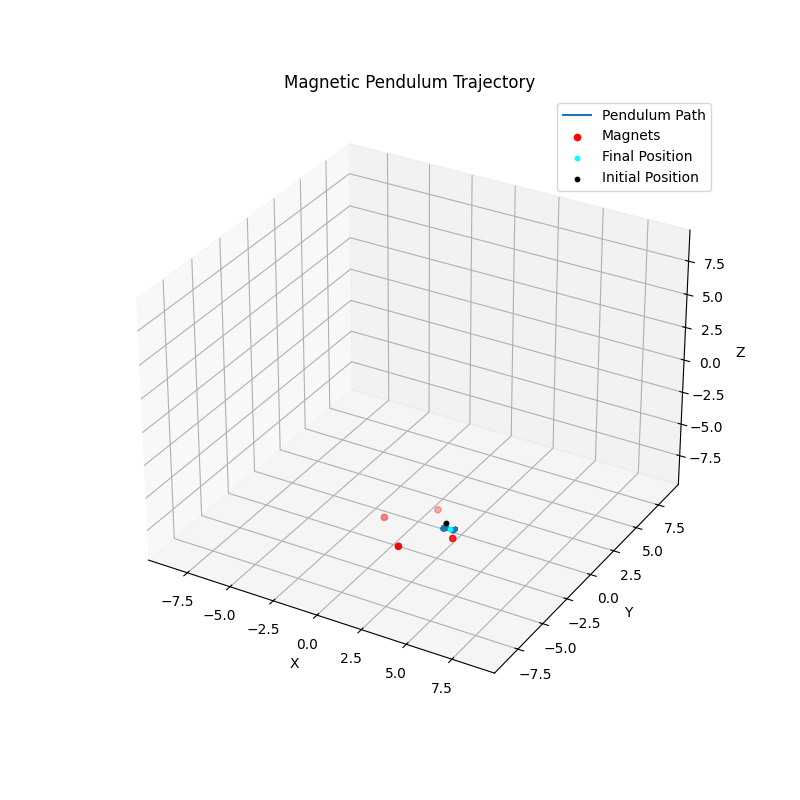

In [28]:
ax = plot_trajectory(trajectory, magnet_positions, L=L_)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [29]:
# plot_trajectory_animation(trajectory, magnet_positions, L=L_, dt=0.001, timestep=20)

# sh

In [30]:
zeroes = (sp.S.Zero, sp.vector.VectorZero())

# θt2, ϕt2 = dynamicsymbols(f'{θt.name}_2 {ϕt.name}_2')
subs = [(θt, -θt), (ϕt, sp.pi+ϕt)]
# subs = [(θt, 2*sp.pi - θt)]
# mysplay = lambda *vs: display((v, sp.simplify(v.subs(subs)) for v in vs))

def test(v, other):
    if sp.expand(v - other) in zeroes:
        display('same!')
        # display(v, other)
        # display()
    elif sp.expand(v + other) in zeroes:
        display('negative!')
        display(v)
        # display()
    else:
        display('different!')
        display(v, other)
        display()

def mysplay(*vs):
    for v in vs:
        v = sp.simplify(v)
        other = sp.simplify(v.subs(subs))
        test(v, other)

def mysplay2(*vs):
    for v in vs:
        other = v.subs(subs)
        test(v, other) 



In [31]:
display(C.position_vector, C.position_vector.subs(subs))

(r(t)*sin(θ(t))*cos(φ(t)))*C.i + (r(t)*sin(θ(t))*sin(φ(t)))*C.j + (-r(t)*cos(θ(t)))*C.k

(r(t)*sin(θ(t))*cos(φ(t)))*C.i + (r(t)*sin(θ(t))*sin(φ(t)))*C.j + (-r(t)*cos(θ(t)))*C.k

In [32]:
mysplay(*C.lame_coefficients)

'same!'

'same!'

'same!'

In [33]:
display(*C.unit_vectors)

(sin(θ(t))*cos(φ(t)))*C.i + (sin(θ(t))*sin(φ(t)))*C.j + (-cos(θ(t)))*C.k

(cos(θ(t))*cos(φ(t)))*C.i + (sin(φ(t))*cos(θ(t)))*C.j + (sin(θ(t)))*C.k

(-sin(θ(t))*sin(φ(t))/Abs(sin(θ(t))))*C.i + (sin(θ(t))*cos(φ(t))/Abs(sin(θ(t))))*C.j

In [34]:
C._direction_vectors[1].dot(C.unit_vectors[1])

r(t)*sin(θ(t))**2 + r(t)*sin(φ(t))**2*cos(θ(t))**2 + r(t)*cos(θ(t))**2*cos(φ(t))**2

In [35]:
C._direction_vectors[1].dot(C.unit_vectors[1]).subs(subs)

r(t)*sin(θ(t))**2 + r(t)*sin(φ(t))**2*cos(θ(t))**2 + r(t)*cos(θ(t))**2*cos(φ(t))**2

In [36]:
mysplay(*C.unit_vectors)

'same!'

'negative!'

(cos(θ(t))*cos(φ(t)))*C.i + (sin(φ(t))*cos(θ(t)))*C.j + (sin(θ(t)))*C.k

'same!'

In [37]:
mysplay(*C.velocity_vector)

'same!'

'negative!'

r(t)*Derivative(θ(t), t)

'same!'

In [38]:
mysplay(*C.acceleration_vector)

'same!'

'negative!'

-r(t)*sin(2*θ(t))*Derivative(φ(t), t)**2/2 + r(t)*Derivative(θ(t), (t, 2)) + 2*Derivative(r(t), t)*Derivative(θ(t), t)

'same!'

In [39]:
mysplay(*C.acceleration_components(np.array([sp.S.Zero, sp.S.Zero, sp.S.Zero])))

'same!'

'negative!'

sin(2*θ(t))*Derivative(φ(t), t)**2/2 - 2*Derivative(r(t), t)*Derivative(θ(t), t)/r(t)

'same!'

In [40]:
mysplay(*P.Energy(gravity()).to_force().F)

'same!'

'negative!'

-9.80665*m*sin(θ(t))

'same!'

In [41]:
mysplay2(*P.Energy(magnetic_potential_energy()).to_force().F)

'same!'

'negative!'

(p_0*(-3*L*r(t)*sin(θ(t)) + 3*R*r(t)*cos(phi_mag0 - φ(t))*cos(θ(t)) - 3*h*r(t)*sin(θ(t)))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag0 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)) + p_1*(-3*L*r(t)*sin(θ(t)) + 3*R*r(t)*cos(phi_mag1 - φ(t))*cos(θ(t)) - 3*h*r(t)*sin(θ(t)))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag1 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)) + p_2*(-3*L*r(t)*sin(θ(t)) + 3*R*r(t)*cos(phi_mag2 - φ(t))*cos(θ(t)) - 3*h*r(t)*sin(θ(t)))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag2 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)) + p_3*(-3*L*r(t)*sin(θ(t)) + 3*R*r(t)*cos(phi_mag3 - φ(t))*cos(θ(t)) - 3*h*r(t)*sin(θ(t)))/(3*(L**2 + 2*L*h - 2*L*r(t)*cos(θ(t)) + R**2 - 2*R*r(t)*sin(θ(t))*cos(phi_mag3 - φ(t)) + h**2 - 2*h*r(t)*cos(θ(t)) + r(t)**2)**(5/2)))/r(t)

'same!'

In [42]:
mysplay(*P.Force(damping_force()).F)

'same!'

'negative!'

-b*r(t)*Derivative(θ(t), t)

'same!'

In [43]:
force = bob.overall_force().F

In [44]:
sp.simplify(sp.expand(force[1] + force[1].subs(subs)))
### i.e. negative

0

In [45]:
sp.simplify(sp.expand(force[2] - force[2].subs(subs)))
### i.e. same

0

In [46]:
C.unit_vectors[1]

(cos(θ(t))*cos(φ(t)))*C.i + (sin(φ(t))*cos(θ(t)))*C.j + (sin(θ(t)))*C.k

In [47]:
accel = bob.acceleration_equations()

found free variables in acceleration wrt r(t):{TENSION}. assuming acceleration in this direction is 0


In [48]:
sp.simplify(sp.expand(accel[1] + accel[1].subs(subs)))
### i.e. negative

0

In [49]:
sp.simplify(sp.expand(accel[2] - accel[2].subs(subs)))
### i.e. same

0